In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

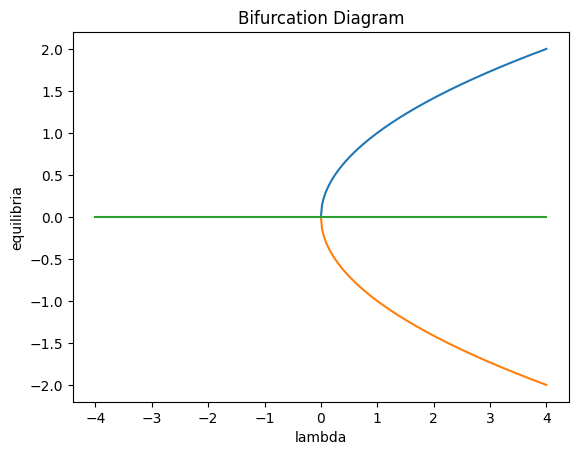

In [9]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7,
            maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values. 62 Lab 7. Bifurcations
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return lmbda*x - x**3
# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(4, 0, 200), 2, F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(4, 0, 200), -2, F)

C3, X3 = EmbeddingAlg(np.linspace(-4, 4, 200), 0, F)

# plot C1, X1, C2, X2, C3, X3
plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.xlabel('lambda')
plt.ylabel('equilibria')
plt.title('Bifurcation Diagram')
plt.show()


# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

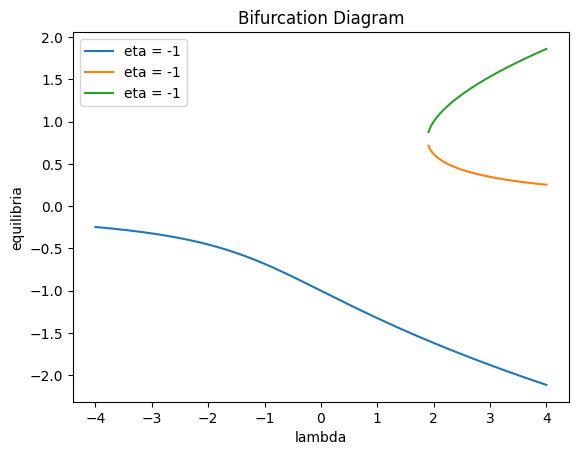

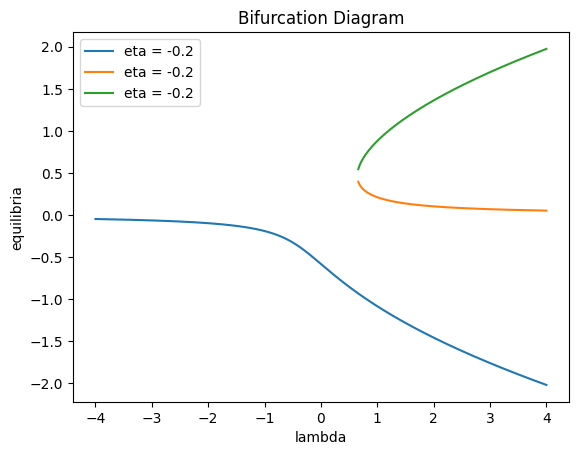

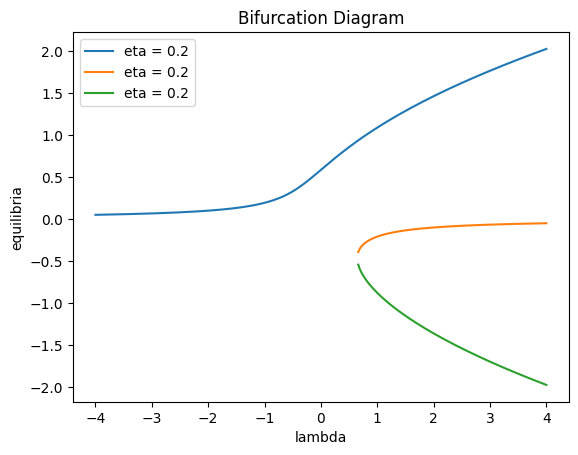

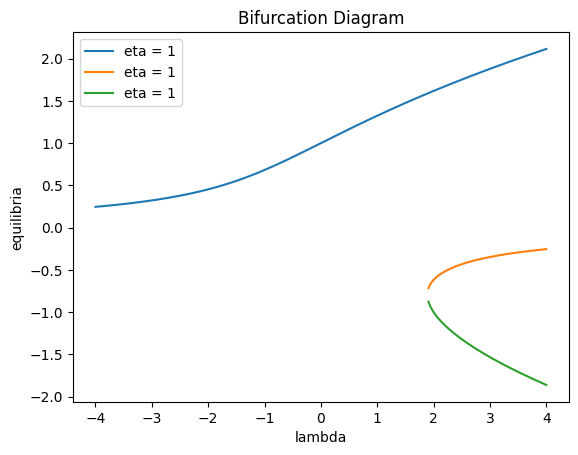

In [29]:
def F(eta):
    return lambda x, lmbda: eta + lmbda*x - x**3

# guess initial points unique to eta
inits = [
    [-1, .5, 2],
    [1, -.3, 2],
    [1, -.2, -2],
    [1, -.2, -2],
]

# plot bifurcation diagram for each eta
for i, n in enumerate([-1, -.2, .2, 1]):
    g_1, g_2, g_3 = inits[i]
    C1, X1 = EmbeddingAlg(np.linspace(-4, 4, 400), g_1, F(n))
    C2, X2 = EmbeddingAlg(np.linspace(4, 0, 200), g_2, F(n))
    C3, X3 = EmbeddingAlg(np.linspace(4, 0, 200), g_3, F(n))
    plt.plot(C1, X1, label = 'eta = ' + str(n))
    plt.plot(C2, X2, label = 'eta = ' + str(n))
    plt.plot(C3, X3, label = 'eta = ' + str(n))
    
    plt.legend()
    plt.xlabel('lambda')
    plt.ylabel('equilibria')
    plt.title('Bifurcation Diagram')
    plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

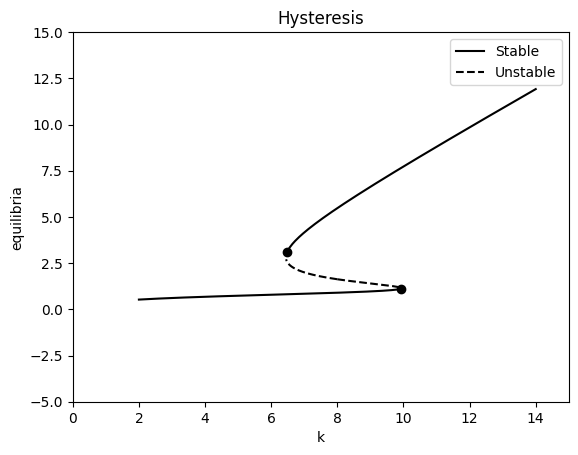

In [28]:
F = lambda x, k: 0.56 * x*(1 - x / k) - (x**2 / (1 + x**2))

C1, X1 = EmbeddingAlg(np.linspace(2, 10, 200), 1.5, F)
C2, X2 = EmbeddingAlg(np.linspace(8, 10, 200), 2.5, F)
C3, X3 = EmbeddingAlg(np.linspace(8, 6, 200), 2.5, F)
C4, X4 = EmbeddingAlg(np.linspace(14, 6, 200), 10, F)

# plot C1, X1, C2, X2, C3, X3
#plot thick line for C1, X1
plt.plot(C1, X1, "k")

# plot dotted line for C2, X2
plt.plot(C2, X2, "--k")
plt.plot(C3, X3, "--k")
plt.plot(C4, X4, "k")

# plot points
plt.plot([C1[-1], C4[-1]], [X1[-1], X4[-1]], "ok")

# match domain and range
plt.xlim(0,15)
plt.ylim(-5,15)

plt.legend(["Stable", "Unstable"])
plt.xlabel('k')
plt.ylabel('equilibria')
plt.title('Hysteresis')
plt.show()